In [5]:
import qiskit
import qiskit_aer
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import quimb.gates as gates
import matplotlib.pyplot as plt
import scipy as sp

In [6]:
psi= qu.rand_matrix_product_state(n=5, bond_dim=10, phys_dim=2)
psi

array([[-0.0520302 -1.09575720e-01j],
       [ 0.02423864-4.38254964e-02j],
       [-0.03035498+1.11268501e-02j],
       [-0.01462991-2.29649168e-02j],
       [-0.25071354+1.76097628e-01j],
       [-0.23155747-5.11695365e-02j],
       [-0.04836965+8.74510740e-02j],
       [ 0.01333131+1.00018006e-01j],
       [-0.23551399+2.19458512e-02j],
       [ 0.08001771+2.62013022e-02j],
       [ 0.08458568+6.48362317e-02j],
       [ 0.05836469+2.44923437e-01j],
       [ 0.00301457-7.79697518e-02j],
       [ 0.44763658-4.50627335e-02j],
       [ 0.25280189-3.49397100e-01j],
       [ 0.11178033+1.61109368e-01j],
       [-0.17457656-1.52682322e-01j],
       [ 0.01951171-7.80637948e-02j],
       [ 0.0124869 -2.45194695e-02j],
       [-0.05055469+8.08714015e-02j],
       [-0.00972508+9.70686760e-02j],
       [-0.06726827+1.45797340e-01j],
       [-0.00238422+5.85860550e-02j],
       [-0.10720692+3.07392980e-02j],
       [ 0.06647211-1.31729986e-01j],
       [-0.10684429-7.59554601e-02j],
       [-0.0

 2 4 4 2 
>─>─>─>─●
│ │ │ │ │


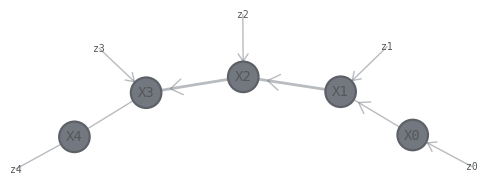

In [7]:
ten= qtn.MatrixProductState.from_dense(psi, site_tag_id = 'X{}', site_ind_id = 'z{}')
ten.show()
ten.draw()

DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.
Original statevector:
 [0.08804509+0.j 0.26413527+0.j 0.08804509+0.j 0.17609018+0.j
 0.61631563+0.j 0.70436073+0.j 0.        +0.j 0.08804509+0.j]

Prepared statevector:
 Statevector([0.2223761 +0.j, 0.01668133+0.j, 0.20719253+0.j,
             0.13457683+0.j, 0.85300247+0.j, 0.36232483+0.j,
             0.06596052+0.j, 0.16120686+0.j],
            dims=(2, 2, 2))


/tmp/ipykernel_1258/2372994924.py:31: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  plt.bar(range(len(output_statevector)), output_statevector.real, alpha=0.5, label='Prepared (Re)')


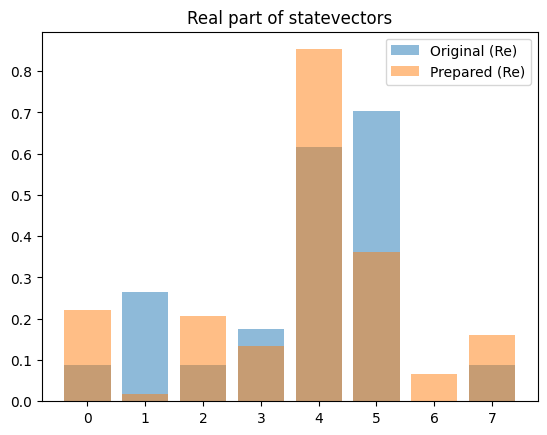

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import transpile
from qiskit_aer import Aer
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit.visualization import plot_state_city

# Define statevector
psi = np.array([1, 3, 1, 2, 7, 8, 0, 1], dtype=complex)
psi /= np.linalg.norm(psi)

# Create QuantumState and circuit
state = QuantumState.from_dense_data(psi)
circuit = state.generate_mps_initializer_circuit(number_of_layers=7)

# Set backend
backend = Aer.get_backend('statevector_simulator')

# Transpile and run
t_circuit = transpile(circuit, backend)
job = backend.run(t_circuit)
result = job.result()

# Get output statevector
output_statevector = result.get_statevector()

print("Original statevector:\n", psi)
print("\nPrepared statevector:\n", output_statevector)

plt.bar(range(len(psi)), psi.real, alpha=0.5, label='Original (Re)')
plt.bar(range(len(output_statevector)), output_statevector.real, alpha=0.5, label='Prepared (Re)')
plt.legend()
plt.title("Real part of statevectors")
plt.show()


In [9]:
def bond2_mps_approximation(psi: qu.qarray, normalize=True) -> qtn.MatrixProductState:
        
    if not np.isclose(np.linalg.norm(psi), 1.0):
        raise ValueError("The state vector must be normalized. The norm was: " + str(np.linalg.norm(psi)))
        
    mps = qtn.MatrixProductState.from_dense(psi, max_bond=2)

    if normalize:
        mps.normalize()

    mps.right_canonicalize(inplace=True)

    bond_sizes = mps.bond_sizes()
    # check if any of the bond sizes are 1
    if any([bond_size != 2 for bond_size in bond_sizes]):
        raise ValueError("The bond sizes of the MPS should be exactly 2.")

    return mps

MatrixProductState([
    Tensor(shape=(2, 2), inds=('k0', '_d9e17eAAADT'), tags=oset(['I0'])),
    Tensor(shape=(2, 2, 2), inds=('_d9e17eAAADT', 'k1', '_d9e17eAAADU'), tags=oset(['I1']), left_inds=('k1', '_d9e17eAAADU')),
    Tensor(shape=(2, 2, 2), inds=('_d9e17eAAADU', 'k2', '_d9e17eAAADV'), tags=oset(['I2']), left_inds=('k2', '_d9e17eAAADV')),
    Tensor(shape=(2, 2), inds=('_d9e17eAAADV', 'k3'), tags=oset(['I3']), left_inds=('k3',)),
], tensors=4, indices=7, L=4, max_bond=2)
 2 2 2 
●─<─<─<
│ │ │ │


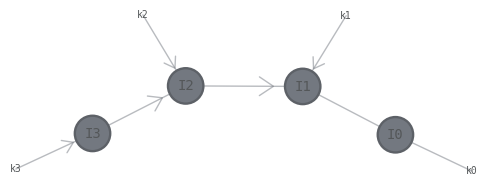

In [16]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np

# Create a normalized wavefunction (3-qubit state, 8 entries)
phi = qu.rand_ket(16)  # this is ∈ ℂ^8 and already normalized

# Approximate it as MPS with max bond dim 2
mps = bond2_mps_approximation(phi)
print(mps)
mps.show()
mps.draw()

In [ ]:
import qiskit
import numpy as np
import scipy as sp




